In [ ]:
CONCEPTS_dict = {
    # ==========================================
    # Group 1: Density & Composition
    # ==========================================

    # 1. Solid - Unchanged
    # Definition: High density completely obscuring lung vascular markings.
    "solid": [
        "solid", "soft-tissue attenuation", "solid attenuation", 
        "dense solid structure", "high density nodule"
    ],

    # 2. Part-solid/Mixed - Unchanged
    # Definition: Highest malignant risk, mixing ground-glass and solid components.
    "part_solid": [
        "part-solid", "subsolid", "mixed ground-glass density",
        "a solid focus within ground-glass", "heterogeneous attenuation"
    ],

    # 3. Pure GGN - Unchanged
    # Definition: Hazy density, does not obscure vessels.
    "pure_GGN": [
        "pure ground-glass", "non-solid", "pure GGO",
        "hazy ground-glass opacity", "non-solid attenuation"
    ],

    # 4. Fat Containing - [NEW]
    # Significance: Usually suggests Hamartoma or lipoid pneumonia; benign indicator.
    "fat_containing": [
        "fat density", "fatty attenuation", "lipid-rich",
        "low density fat component", "containing macroscopic fat"
    ],

    # 5. Halo Sign - [NEW]
    # Significance: Ground-glass halo surrounding the nodule; common in infection (Aspergillus) or hemorrhagic metastasis.
    "halo_sign": [
        "halo sign", "surrounded by ground-glass halo", "perilesional halo",
        "nodule with a ground-glass rim"
    ],

    # ==========================================
    # Group 2: Margins & Borders
    # ==========================================

    # 6. Spiculation - Unchanged
    # Significance: Radiating extension; typical manifestation of infiltrative growth in malignant tumors.
    "spiculation": [
        "spiculated", "radial spicules", "sunburst appearance",
        "spiculated margins", "spikes extending outward"
    ],

    # 7. Lobulation - Unchanged
    # Significance: Uneven surface; uneven growth rate.
    "lobulation": [
        "lobulated", "lobulation", "scalloped contour",
        "deeply lobulated", "wavy border"
    ],

    # 8. Smooth/Well-defined - [NEW]
    # Significance: Typical feature of benign nodules (e.g., cysts, hamartomas) or metastases.
    "smooth_margin": [
        "smooth margin", "well-circumscribed", "sharp borders",
        "well-defined edges", "clear boundary"
    ],

    # 9. Ill-defined - [NEW]
    # Significance: Distinct from spiculation; refers to borders fading away; common in inflammation or invasive adenocarcinoma.
    "ill_defined": [
        "ill-defined", "fuzzy margins", "indistinct borders",
        "blurred edges", "poorly defined"
    ],

    # ==========================================
    # Group 3: Shape & Geometry
    # ==========================================

    # 10. Round/Spherical - Unchanged
    # Significance: Indication of high tension.
    "round_shape": [
        "round", "spherical", "circular shape",
        "perfectly round", "ball-like"
    ],

    # 11. Polygonal/Irregular - [NEW]
    # Significance: Common in inflammatory nodules or perifissural nodules (PFN).
    "polygonal_shape": [
        "polygonal shape", "angular shape", "geometric shape",
        "flat edges", "irregular non-spherical shape"
    ],

    # 12. Elongated/Elliptical - [NEW]
    # Significance: May suggest mucoid impaction or benign scarring.
    "elongated": [
        "elongated", "elliptical", "oval shape",
        "sausage-like appearance", "fusiform"
    ],

    # ==========================================
    # Group 4: Internal Texture
    # ==========================================

    # 13. Air Bronchogram - [Split from old category]
    # Significance: Tubular air opacity; common in adenocarcinoma or lymphoma (bronchus not destroyed).
    "air_bronchogram": [
        "air bronchogram", "tubular air lucency", "patent bronchus within nodule",
        "air-filled bronchus"
    ],

    # 14. Bubble Lucency - [NEW / Split]
    # Significance: Tiny air pockets (<5mm); an important feature of early invasive adenocarcinoma.
    "bubble_lucency": [
        "bubble-like lucency", "vacuole sign", "pseudocavitation",
        "small internal air pockets", "cystic airspaces"
    ],

    # 15. Thick-walled/Large Cavity - [Split]
    # Significance: Necrotic discharge; seen in squamous cell carcinoma, tuberculosis, aspergilloma.
    "cavity": [
        "cavitary", "thick-walled cavity", "central cavitation",
        "large central air space", "necrotic cavity"
    ],

    # 16. Typical Benign Calcification - Unchanged
    "benign_calc": [
        "diffuse calcification", "central calcification", "popcorn calcification",
        "laminar calcification", "calcified granuloma pattern"
    ],

    # 17. Eccentric/Punctate (Suspicious) Calcification - Unchanged
    "suspicious_calc": [
        "eccentric calcification", "punctate calcification", "stippled calcification",
        "amorphous calcification", "dystrophic calcification"
    ],

    # ==========================================
    # Group 5: Context & Quality
    # ==========================================

    # 18. Pleural Attachment/Tag - [NEW]
    # Significance: Linear opacity extending from nodule to pleura; suggests pleural retraction; malignant sign.
    "pleural_attachment": [
        "pleural tag", "pleural tail", "indenting the pleura",
        "attached to pleura", "pleural retraction"
    ],

    # 19. Vascular Convergence - [NEW]
    # Significance: Surrounding vessels gathering toward the nodule; suggests rich tumor blood supply or fibrotic traction.
    "vascular_convergence": [
        "vascular convergence", "vessel convergence", "vessels drawn into nodule",
        "vascular notch", "supplying vessels"
    ],

    # 20. Very Subtle/Low Contrast - Unchanged
    # Significance: Used to test model robustness on hard cases.
    "very_subtle": [
        "very subtle", "faint appearance", "low-contrast",
        "barely visible", "ghost-like opacity"
    ]
}

# 1 Compute Text Embeddings for 20 Concept Classes and Save to conceptclip_features_20.h5

Goal: Using the same PROMPT_TEMPLATES from `(1)_Dataloader_create.ipynb`, generate prompts for all concept synonyms in the current `CONCEPTS_dict`, call the ConceptCLIP text encoder to obtain embeddings, and save only text embeddings to a new H5 file (excluding image-related content).

In [ ]:
# 1. Flatten concept synonyms into concept_list
concept_list = []
for k, synonyms in CONCEPTS_dict.items():
    for s in synonyms:
        if s not in concept_list:
            concept_list.append(s)
len(concept_list), concept_list[:5]

(98,
 ['solid',
  'soft-tissue attenuation',
  'solid attenuation',
  'dense solid structure',
  'high density nodule'])

In [ ]:
# 2. PROMPT_TEMPLATES (same as before)
PROMPT_TEMPLATES = [
    "chest CT showing a pulmonary nodule: {}.",
    "axial chest CT of a pulmonary nodule, {}.",
    "lung window CT depicting a pulmonary nodule, {}.",
    "chest CT image of a pulmonary nodule showing {}.",
    "axial lung CT slice demonstrating {}.",
    "a pulmonary nodule characterized by {}.",
    "chest CT where the pulmonary nodule is {}.",
    "chest CT showing a pulmonary nodule with features of {}.",
    "pulmonary nodule, {}.",
    "CT scan, lung nodule, {}."
]
len(PROMPT_TEMPLATES)

10

In [ ]:
# 3. Generate template_texts_map: each template corresponds to all concept prompts
template_texts_map = {}
for idx, template in enumerate(PROMPT_TEMPLATES, start=1):
    formatted_texts = [template.format(text) for text in concept_list]
    template_id = f"concept20_prompts_t{idx:02d}"
    template_texts_map[template_id] = formatted_texts
list(template_texts_map.keys())[:3], len(template_texts_map)

(['concept20_prompts_t01', 'concept20_prompts_t02', 'concept20_prompts_t03'],
 10)

In [ ]:
# 4. Load ConceptCLIP model and processor
from transformers import AutoModel, AutoProcessor
import torch, os, h5py, json, time, numpy as np
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
MODEL_NAME = 'JerrryNie/ConceptCLIP'
token="YOUR_TOKEN"  # NOTE: Replace with your own token; avoid hard-coding secrets in production.

try:
    from huggingface_hub import login
    hf_token = os.environ.get('HF_TOKEN', None)
    if hf_token:
        login(token=hf_token)
except Exception:
    pass
model = AutoModel.from_pretrained(MODEL_NAME, trust_remote_code=True).to(device).eval()
processor = AutoProcessor.from_pretrained(MODEL_NAME, trust_remote_code=True)
processor.image_processor.do_rescale = False
processor.image_processor.do_normalize = True
print(f"Loaded ConceptCLIP on {device}")

c:\Users\chenk\.conda\envs\pyg_monai\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\chenk\.conda\envs\pyg_monai\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\chenk\.conda\envs\pyg_monai\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\chenk\.conda\envs\pyg_monai\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWar

Loaded ConceptCLIP on cuda:0


In [ ]:
# 5. Simplified H5 write function (text features only)
OUT_PATH_20 = 'conceptclip_features_20.h5'
DTYPE_TEXT = 'float32'

def _hash_texts(texts):
    import hashlib
    h = hashlib.sha256()
    for t in texts:
        h.update(t.encode('utf-8')); h.update(b'\0')
    return h.hexdigest()

def init_text_file(path):
    if not os.path.exists(path):
        with h5py.File(path, 'w') as f:
            f.create_group('templates')
            f.attrs['created_at'] = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime())
            f.attrs['version'] = 'text-only-1.0'
    return h5py.File(path, 'a')

def write_template_text_only(f, template_id, texts, text_features):
    g_root = f['templates']
    if template_id in g_root:
        del g_root[template_id]
    g = g_root.create_group(template_id)
    arr = text_features.detach().cpu().numpy().astype(DTYPE_TEXT)
    g.create_dataset('text_features', data=arr, compression='lzf')
    dt_str = h5py.string_dtype(encoding='utf-8')
    ds_txt = g.create_dataset('texts', shape=(len(texts),), dtype=dt_str, compression='lzf')
    ds_txt[:] = np.array(texts, dtype=object)
    g.attrs['K'] = arr.shape[0]
    g.attrs['D'] = arr.shape[1]
    g.attrs['texts_hash'] = _hash_texts(texts)
    g.attrs['created_at'] = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime())
    f.flush()

In [ ]:
# 6. Encode and save all template text features
stored_templates = []
with torch.no_grad():
    with init_text_file(OUT_PATH_20) as f:
        f.attrs['concept_texts'] = json.dumps(concept_list, ensure_ascii=False)
        f.attrs['prompt_temp_for_concepts'] = json.dumps(PROMPT_TEMPLATES, ensure_ascii=False)
        for key in ['logit_scale','logit_bias','concept_logit_scale','concept_logit_bias']:
            if hasattr(model, key):
                val = getattr(model, key)
                try:
                    scalar = float(val.item()) if torch.is_tensor(val) else float(val)
                except Exception:
                    scalar = None
                if scalar is not None:
                    f.attrs[key] = scalar
        for template_id, texts in template_texts_map.items():
            text_inputs = processor(text=texts, return_tensors='pt', padding=True, truncation=True).to(device)
            text_cls, text_tokens = model.encode_text(text_inputs['input_ids'], normalize=True)
            write_template_text_only(f, template_id, texts, text_cls)
            stored_templates.append((template_id, text_cls.shape))
print('Done. Stored templates:')
stored_templates[:3], f"Total={len(stored_templates)}"

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Done. Stored templates:


([('concept20_prompts_t01', torch.Size([98, 1152])),
  ('concept20_prompts_t02', torch.Size([98, 1152])),
  ('concept20_prompts_t03', torch.Size([98, 1152]))],
 'Total=10')

In [ ]:
# 7. Validate new H5 file structure
def validate_text_h5(path=OUT_PATH_20, max_templates=2):
    if not os.path.exists(path):
        print('File not found:', path)
        return
    with h5py.File(path, 'r') as f:
        templates = list(f['templates'].keys())
        print(f"Templates count: {len(templates)}")
        meta_concepts = json.loads(f.attrs.get('concept_texts','[]'))
        print(f"Concept texts count: {len(meta_concepts)}")
        for tid in templates[:max_templates]:
            g = f['templates'][tid]
            print(f" - {tid}: text_features shape={g['text_features'].shape}")
            print('   sample texts:', g['texts'][:2])
validate_text_h5()

Templates count: 10
Concept texts count: 98
 - concept20_prompts_t01: text_features shape=(98, 1152)
   sample texts: [b'chest CT showing a pulmonary nodule: solid.'
 b'chest CT showing a pulmonary nodule: soft-tissue attenuation.']
 - concept20_prompts_t02: text_features shape=(98, 1152)
   sample texts: [b'axial chest CT of a pulmonary nodule, solid.'
 b'axial chest CT of a pulmonary nodule, soft-tissue attenuation.']


# 2 Load Image Features

In [10]:
import pandas as pd
df_image_features = pd.read_csv('./image_features/df_image_features.csv')
df_image_features

,patient_id,pid_nid_combo,img_path_curated,area_mm2,malignancy_label,img_shape_H,img_shape_W,0,1,2,...,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151
0,LIDC-IDRI-0078,LIDC-IDRI-0078_0,./datasets/curation2/lidc_patches_all\LIDC-IDR...,156.325000,1,44,54,-0.014310,0.04358,0.019580,...,0.011170,-0.015670,0.004425,0.001112,0.001486,-0.011640,-0.012375,0.005116,0.005550,-0.000785
1,LIDC-IDRI-0078,LIDC-IDRI-0078_0,./datasets/curation2/lidc_patches_all\LIDC-IDR...,184.210000,1,44,54,-0.009850,0.04022,0.016330,...,0.022350,0.000509,-0.003216,-0.007042,-0.006090,-0.008360,-0.003440,0.016190,0.007324,-0.011856
2,LIDC-IDRI-0078,LIDC-IDRI-0078_0,./datasets/curation2/lidc_patches_all\LIDC-IDR...,191.392500,1,44,54,-0.013990,0.04984,0.013860,...,0.013360,-0.011940,-0.000933,-0.014030,0.000093,-0.014710,-0.007732,0.011150,-0.002663,-0.006973
3,LIDC-IDRI-0078,LIDC-IDRI-0078_0,./datasets/curation2/lidc_patches_all\LIDC-IDR...,147.875000,1,44,54,-0.024000,0.05508,0.025880,...,0.019970,-0.017500,0.002111,-0.013340,0.007990,-0.018000,-0.012290,0.005417,-0.015610,-0.004590
4,LIDC-IDRI-0078,LIDC-IDRI-0078_0,./datasets/curation2/lidc_patches_all\LIDC-IDR...,81.120000,1,44,54,-0.015820,0.02773,0.019530,...,0.028120,-0.006874,0.009550,-0.022280,0.005154,-0.013680,-0.018630,0.003464,0.001287,-0.014800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2527,LIDC-IDRI-0127,LIDC-IDRI-0127_0,./datasets/curation2/lidc_patches_all\LIDC-IDR...,904.275089,0,61,62,-0.015070,0.05515,0.002968,...,0.010560,0.001786,0.003117,-0.024460,-0.017470,-0.005577,-0.023390,0.007607,0.000157,-0.001746
2528,LIDC-IDRI-0127,LIDC-IDRI-0127_0,./datasets/curation2/lidc_patches_all\LIDC-IDR...,974.722309,0,61,62,-0.023030,0.03973,-0.001191,...,0.016000,-0.006306,0.006610,-0.018110,-0.013954,-0.005775,-0.015220,0.013374,0.005024,-0.005726
2529,LIDC-IDRI-0127,LIDC-IDRI-0127_0,./datasets/curation2/lidc_patches_all\LIDC-IDR...,999.014454,0,61,62,-0.021590,0.04694,-0.003807,...,0.015430,-0.010390,0.003975,-0.019500,0.000217,-0.017880,-0.014595,0.006645,-0.018540,-0.001879
2530,LIDC-IDRI-0127,LIDC-IDRI-0127_0,./datasets/curation2/lidc_patches_all\LIDC-IDR...,949.822861,0,61,62,-0.014786,0.04645,0.004658,...,0.014145,-0.000487,0.011850,-0.022100,-0.007590,-0.012146,-0.013470,0.011030,-0.014880,-0.003157


In [ ]:
# 8. Load text features and build concept -> embeddings mapping
import h5py, numpy as np, json, pandas as pd, math
TEXT_H5_PATH = 'conceptclip_features_20.h5'
if not os.path.exists(TEXT_H5_PATH):
    raise FileNotFoundError(f'Text features file not found: {TEXT_H5_PATH}')
concept_embeddings_map = {}  # concept -> [T, D]
template_ids = []
with h5py.File(TEXT_H5_PATH, 'r') as f:
    templates_grp = f['templates']
    template_ids = sorted(list(templates_grp.keys()))
    # Get concept_list (maintaining the same order as when generating text)
    if 'concept_texts' in f.attrs:
        concept_list_from_file = json.loads(f.attrs['concept_texts'])
    else:
        concept_list_from_file = concept_list  # fallback
    # Initialize list: collect embeddings from each template for each concept
    collector = {c: [] for c in concept_list_from_file}
    for tid in template_ids:
        g = templates_grp[tid]
        feats = g['text_features'][:]  # [K,D]
        # Assuming order corresponds one-to-one with concept_list_from_file
        for idx, c in enumerate(concept_list_from_file):
            collector[c].append(feats[idx])
    # Stack
    for c, lst in collector.items():
        concept_embeddings_map[c] = np.stack(lst, axis=0)  # [T,D]
# Normalize all text vectors
for c, emb in concept_embeddings_map.items():
    norm = np.linalg.norm(emb, axis=1, keepdims=True)
    norm[norm==0] = 1.0
    concept_embeddings_map[c] = emb / norm
print(f'Loaded {len(concept_embeddings_map)} concepts, each with {concept_embeddings_map[next(iter(concept_embeddings_map))].shape[0]} template variants.')

Loaded 98 concepts, each with 10 template variants.


In [ ]:
import warnings
warnings.filterwarnings('ignore', category=pd.errors.PerformanceWarning)

# 9. Identify image embedding columns and compute image-level concept scores (mean/max across prompts)
# Assuming df_image_features is loaded and contains a unique nodule identifier column pid_nid_combo or patient/nodule info
if 'df_image_features' not in globals():
    raise RuntimeError('df_image_features not loaded, please run the CSV reading cell first.')

# Find embedding column names: exclude obvious id / meta columns
exclude_cols = {'patient_id','pid_nid_combo','img_path_curated','area_mm2','malignancy_label','img_shape_H','img_shape_W','split','nodule_index','nodule_index_in_patient'}
numeric_cols = [c for c in df_image_features.columns if c not in exclude_cols and pd.api.types.is_numeric_dtype(df_image_features[c])]
if len(numeric_cols) == 0:
    raise ValueError('No numeric columns found for image embeddings, please check the structure of df_image_features.')

emb_matrix = df_image_features[numeric_cols].to_numpy(dtype='float32')  # [N,D_img]
# If not normalized, perform L2 normalization here
row_norm = np.linalg.norm(emb_matrix, axis=1, keepdims=True)
row_norm[row_norm==0] = 1.0
emb_matrix = emb_matrix / row_norm

# Check dimension consistency to match text vector dimensions; raise error if mismatch
D_img = emb_matrix.shape[1]
# Get text vector dimension from any concept
any_concept = next(iter(concept_embeddings_map))
D_txt = concept_embeddings_map[any_concept].shape[1]
if D_img != D_txt:
    raise ValueError(f'Image vector dimension {D_img} does not match text vector dimension {D_txt}, please check the source.')

# Compute: for each image and each concept, dot product with all template embeddings -> [T] scores, then take mean / max
image_concept_mean = np.zeros((emb_matrix.shape[0], len(concept_embeddings_map)), dtype='float32')
image_concept_max  = np.zeros((emb_matrix.shape[0], len(concept_embeddings_map)), dtype='float32')
concept_names_order = list(concept_embeddings_map.keys())

for ci, cname in enumerate(concept_names_order):
    c_emb = concept_embeddings_map[cname]  # [T,D]
    # Dot product: emb_matrix @ c_emb.T -> [N,T]
    scores = emb_matrix @ c_emb.T
    image_concept_mean[:, ci] = scores.mean(axis=1)
    image_concept_max[:,  ci] = scores.max(axis=1)

# Build image-level DataFrame (including malignancy_label for subsequent aggregation)
image_scores_df = pd.DataFrame({
    **({'pid_nid_combo': df_image_features['pid_nid_combo']} if 'pid_nid_combo' in df_image_features.columns else {}),
    **({'patient_id': df_image_features['patient_id']} if 'patient_id' in df_image_features.columns else {}),
    **({'malignancy_label': df_image_features['malignancy_label']} if 'malignancy_label' in df_image_features.columns else {}),
})
for ci, cname in enumerate(concept_names_order):
    image_scores_df[f'{cname}_mean_prompt'] = image_concept_mean[:, ci]
    image_scores_df[f'{cname}_max_prompt']  = image_concept_max[:, ci]

image_scores_df.head(3)

,pid_nid_combo,patient_id,malignancy_label,solid_mean_prompt,solid_max_prompt,soft-tissue attenuation_mean_prompt,soft-tissue attenuation_max_prompt,solid attenuation_mean_prompt,solid attenuation_max_prompt,dense solid structure_mean_prompt,...,very subtle_mean_prompt,very subtle_max_prompt,faint appearance_mean_prompt,faint appearance_max_prompt,low-contrast_mean_prompt,low-contrast_max_prompt,barely visible_mean_prompt,barely visible_max_prompt,ghost-like opacity_mean_prompt,ghost-like opacity_max_prompt
0,LIDC-IDRI-0078_0,LIDC-IDRI-0078,1,0.134531,0.185346,0.125419,0.184737,0.147826,0.206102,0.128972,...,0.104277,0.175782,0.111158,0.175536,0.142865,0.203103,0.081449,0.167393,0.134830,0.191516
1,LIDC-IDRI-0078_0,LIDC-IDRI-0078,1,0.102361,0.128306,0.102469,0.147085,0.118833,0.161967,0.095030,...,0.094658,0.146197,0.084143,0.125878,0.114378,0.156437,0.066458,0.125159,0.096404,0.129230
2,LIDC-IDRI-0078_0,LIDC-IDRI-0078,1,0.125261,0.161946,0.123365,0.174834,0.139258,0.188709,0.122283,...,0.099665,0.157756,0.092139,0.143806,0.131508,0.177364,0.072622,0.141979,0.121691,0.165448


In [ ]:
# 10. Nodule-level aggregation: for the same pid_nid_combo, aggregate concept scores across multiple images using mean/max
if 'pid_nid_combo' in image_scores_df.columns:
    group_key = 'pid_nid_combo'
else:
    # If this column doesn't exist, try patient_id; aggregation granularity becomes patient-level (not recommended)
    group_key = 'patient_id' if 'patient_id' in image_scores_df.columns else None

if group_key is None:
    raise ValueError('No column found for nodule aggregation (pid_nid_combo or patient_id).')

agg_records = []
for pid_nid, sub in image_scores_df.groupby(group_key):
    rec = {group_key: pid_nid}
    # Aggregate labels: if labels are consistent for the same nodule, take unique value; otherwise take majority/rounded mean
    if 'malignancy_label' in sub.columns:
        vals = sub['malignancy_label'].dropna().values
        if vals.size > 0:
            rec['malignancy_label'] = int(np.round(vals.mean()))
        else:
            rec['malignancy_label'] = -1
    for cname in concept_names_order:
        mean_prompt_scores = sub[f'{cname}_mean_prompt'].values  # prompt mean score for this concept per image
        max_prompt_scores  = sub[f'{cname}_max_prompt'].values   # prompt max score for this concept per image
        # Aggregate across images:
        rec[f'{cname}_mean_over_images'] = float(mean_prompt_scores.mean())
        rec[f'{cname}_max_over_images']  = float(max_prompt_scores.max())
    agg_records.append(rec)

df_nodule_features = pd.DataFrame(agg_records)
print('df_nodule_features shape:', df_nodule_features.shape)
df_nodule_features.head(3)

df_nodule_features shape: (678, 198)


,pid_nid_combo,malignancy_label,solid_mean_over_images,solid_max_over_images,soft-tissue attenuation_mean_over_images,soft-tissue attenuation_max_over_images,solid attenuation_mean_over_images,solid attenuation_max_over_images,dense solid structure_mean_over_images,dense solid structure_max_over_images,...,very subtle_mean_over_images,very subtle_max_over_images,faint appearance_mean_over_images,faint appearance_max_over_images,low-contrast_mean_over_images,low-contrast_max_over_images,barely visible_mean_over_images,barely visible_max_over_images,ghost-like opacity_mean_over_images,ghost-like opacity_max_over_images
0,LIDC-IDRI-0001_0,1,0.130282,0.190296,0.110652,0.177217,0.130308,0.192490,0.124620,0.171977,...,0.067671,0.150291,0.076787,0.145256,0.119016,0.181759,0.050313,0.136801,0.113962,0.162114
1,LIDC-IDRI-0002_0,1,0.105857,0.174993,0.100741,0.156000,0.118502,0.188378,0.086971,0.148155,...,0.104785,0.172811,0.110235,0.160199,0.114909,0.181646,0.088935,0.152967,0.099290,0.171082
2,LIDC-IDRI-0003_0,0,0.084831,0.146845,0.064679,0.139538,0.089721,0.152957,0.076247,0.132860,...,0.061748,0.144194,0.065547,0.136548,0.083606,0.166524,0.055905,0.142804,0.086553,0.156031


In [ ]:
# 11. Save result DataFrame
df_nodule_features.to_csv('./image_features/df_nodule_features_concept20_minmax.csv', index=False)
print('Saved df_nodule_features_concept20_minmax.csv')

Saved df_nodule_features_concept20_minmax.csv


# 3 Logistic Regression

In [ ]:
# Use logistic regression for a simple classification task with K-fold cross-validation for evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
# Prepare data
X_cols = [col for col in df_nodule_features.columns if "mean" in col]
y_col = "malignancy_label"

X = df_nodule_features[X_cols]
y = df_nodule_features[y_col]
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
# 5-fold cross-validation, evaluate AUC and accuracy
scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
print("5-Fold CV AUC scores:", scores)
print("Mean AUC:", scores.mean())
accuracy_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("5-Fold CV Accuracy scores:", accuracy_scores)
print("Mean Accuracy:", accuracy_scores.mean())

5-Fold CV AUC scores: [0.80915179 0.74821429 0.74716855 0.70275769 0.8517179 ]
Mean AUC: 0.7718020426858285
5-Fold CV Accuracy scores: [0.73529412 0.68382353 0.67647059 0.64444444 0.77037037]
Mean Accuracy: 0.7020806100217865


In [ ]:
# Prepare data
X_cols = [col for col in df_nodule_features.columns if "max" in col]
y_col = "malignancy_label"

X = df_nodule_features[X_cols]
y = df_nodule_features[y_col]
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
# 5-fold cross-validation, evaluate AUC and accuracy
scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
print("5-Fold CV AUC scores:", scores)
print("Mean AUC:", scores.mean())
accuracy_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("5-Fold CV Accuracy scores:", accuracy_scores)
print("Mean Accuracy:", accuracy_scores.mean())

5-Fold CV AUC scores: [0.8078125  0.72745536 0.77537197 0.71767631 0.81057866]
Mean AUC: 0.7677789608514959
5-Fold CV Accuracy scores: [0.72058824 0.69852941 0.70588235 0.65185185 0.71851852]
Mean Accuracy: 0.6990740740740741


In [ ]:
# Consider both mean and max aggregated features

# Prepare data
X_cols = [col for col in df_nodule_features.columns if "max" in col or "mean" in col]
y_col = 'malignancy_label'
X = df_nodule_features[X_cols]
y = df_nodule_features[y_col]
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
# 5-fold cross-validation, evaluate AUC and accuracy
scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
print("5-Fold CV AUC scores:", scores)
print("Mean AUC:", scores.mean())
accuracy_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("5-Fold CV Accuracy scores:", accuracy_scores)
print("Mean Accuracy:", accuracy_scores.mean())

5-Fold CV AUC scores: [0.80669643 0.7671875  0.79091717 0.73462929 0.82029837]
Mean AUC: 0.7839457524348847
5-Fold CV Accuracy scores: [0.76470588 0.68382353 0.72058824 0.68148148 0.73333333]
Mean Accuracy: 0.7167864923747277


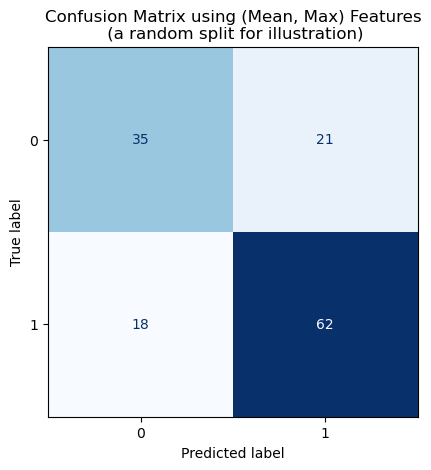

In [ ]:
# Plot confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
def plot_confusion_matrix(model, X, y, title='Confusion Matrix'):
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues, colorbar=False)
    plt.title(title)
    plt.show()
    return cm

cm = plot_confusion_matrix(model, X, y, title='Confusion Matrix using (Mean, Max) Features\n (a random split for illustration)')

In [ ]:
# Display confusion matrix results as DataFrame
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
cm_df

,Predicted 0,Predicted 1
Actual 0,35,21
Actual 1,18,62
